# STEP 0: IS Fine Tuning Required ?

Lets conduct a bkg study on, is fine tune required for the project

In this notebook, we will see different small models that we can fine tune and check how it performs.

If any one of the model is giving accurate results aligning to the requirements of the project 
,we can proceed without fine tuning.

Otherwise we need to fine tune the model for a better result.

Let's try to load different models and test its capabilities.

Different models :

1.GPT2

2.GPT-Neo (125M)

3.CTRL

4.Llama

### Model 1.GPT2

In [1]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
model = GPT2LMHeadModel.from_pretrained('distilgpt2')

# Function to generate text
def generate_story_with_keywords(keywords, emotion, userpref, max_length=150):
    # Create the prompt for the story generation
    prompt = (
        f"Generate a story that evokes a {emotion} emotion. The story should feature a "
        f"{keywords[0]}, a {keywords[1]}, and a {keywords[2]}. "
        f"Additionally, incorporate elements of {userpref} to enhance the narrative. "
        f"Ensure the {userpref} aspects are seamlessly integrated and contribute to the overall {emotion} tone of the story."
    )
    
    # Encode the prompt
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    
    # Generate the story
    outputs = model.generate(
        inputs, 
        max_length=max_length, 
        num_return_sequences=1, 
        no_repeat_ngram_size=2, 
        early_stopping=True
    )
    
    # Decode the generated text
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    return story

# Define the keywords, emotion, and user preferences
keywords = ["dog", "sun", "beach"]
emotion = "happy"
userpref = "history"

# Generate the story
story = generate_story_with_keywords(keywords, emotion, userpref, max_length=150)

# Function to save the story to a file
def save_story_to_file(story, filename='../genstory/generated_story_GPT.txt'):
    with open(filename, 'w') as file:
        file.write(story)

# Save the generated story to a file
save_story_to_file(story)

# Print the generated story
print(story)


c:\Users\puthu\anaconda3\envs\al\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\puthu\anaconda3\envs\al\lib\site-packages\transformers\generation\configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generate a story that evokes a happy emotion. The story should feature a dog, a sun, and a beach. Additionally, incorporate elements of history to enhance the narrative. Ensure the history aspects are seamlessly integrated and contribute to the overall happy tone of the story.

The story is a great way to introduce the characters to their story and to make them feel like they are part of a larger story, but also a way for them to feel more like a part. This is the way the stories are presented. It is important to note that the character is not a character. In fact, the protagonist is an important part in the plot. If you want to create a believable story for the reader, you need to have a strong story


## Performance

In [2]:
import re
from textblob import TextBlob

def count_syllables(word):
    word = word.lower()
    vowels = "aeiouy"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

def readability_analysis(text):
    words = text.split()
    total_words = len(words)
    total_sentences = text.count('.') + text.count('!') + text.count('?')
    total_syllables = sum(count_syllables(word) for word in words)

    flesch_reading_ease = 206.835 - 1.015 * (total_words / total_sentences) - 84.6 * (total_syllables / total_words)
    return flesch_reading_ease


def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity, sentiment.subjectivity

def lexical_diversity(text):
    words = text.split()
    unique_words = set(words)
    ttr = len(unique_words) / len(words)
    return ttr


def cohesion_and_coherence_analysis(text):
    transitions = ["however", "therefore", "moreover", "in addition", "furthermore", "meanwhile", "consequently", "thus", "for example", "for instance"]

    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    transition_count = sum(any(transition in sentence for transition in transitions) for sentence in sentences)

    coherence_score = transition_count / len(sentences)
    return coherence_score

def overall_analysis(text):
    flesch_reading_ease = readability_analysis(text)
    polarity, subjectivity = sentiment_analysis(text)
    ttr = lexical_diversity(text)
    coherence_score = cohesion_and_coherence_analysis(text)
    
    analysis_results = {
        "Flesch Reading Ease": flesch_reading_ease,
        "Sentiment Polarity": polarity,
        "Sentiment Subjectivity": subjectivity,
        "Lexical Diversity (TTR)": ttr,
        "Cohesion and Coherence Score": coherence_score
    }
    
    return analysis_results

analysis_results = overall_analysis(story)
for metric, value in analysis_results.items():
    print(f"{metric}: {value}")


Flesch Reading Ease: 61.90568181818185
Sentiment Polarity: 0.4303030303030303
Sentiment Subjectivity: 0.6439393939393939
Lexical Diversity (TTR): 0.5681818181818182
Cohesion and Coherence Score: 0.0


## Analysis

1. story is incomplete , lack of happiness and no logical flow. model is not able to finish the entire story with a proper ending

## Model 2.GPT-Neo (125M)

In [3]:
import torch
from transformers import GPTNeoForCausalLM, GPT2Tokenizer

# Load GPT-Neo model and tokenizer
model_name = 'EleutherAI/gpt-neo-125M'
model = GPTNeoForCausalLM.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


story = generate_story_with_keywords(keywords, emotion, userpref, max_length=150)
def save_story_to_file(story, filename='../genstory/generated_story_Neo2.txt'):
    with open(filename, 'w') as file:
        file.write(story)

save_story_to_file(story)
print(story)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generate a story that evokes a happy emotion. The story should feature a dog, a sun, and a beach. Additionally, incorporate elements of history to enhance the narrative. Ensure the history aspects are seamlessly integrated and contribute to the overall happy tone of the story.

The story is a good example of a successful storyteller. It is not a bad story, but it is also a great story to tell. If you are a writer, you will find that the stories are very effective. They are not just a simple story but a very powerful story with a lot of elements that will make a reader feel good about the book. You will also find the elements to be very important. For example, the author of this book is


In [4]:
analysis_results = overall_analysis(story)
for metric, value in analysis_results.items():
    print(f"{metric}: {value}")

Flesch Reading Ease: 59.15643410852718
Sentiment Polarity: 0.5146153846153847
Sentiment Subjectivity: 0.6941391941391941
Lexical Diversity (TTR): 0.5658914728682171
Cohesion and Coherence Score: 0.0


### Model 3.CTRL

In [5]:
import time
import torch
from transformers import CTRLTokenizer, CTRLLMHeadModel

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer and model
tokenizer = CTRLTokenizer.from_pretrained('ctrl')
model = CTRLLMHeadModel.from_pretrained('ctrl').to(device)

# Function to generate text
def generate_story_with_keywords(keywords, emotion, userpref, max_length=150):
    # Create the prompt for the story generation
    prompt = (
        f"Generate a story that evokes a {emotion} emotion. The story should feature a "
        f"{keywords[0]}, a {keywords[1]}, and a {keywords[2]}. "
        f"Additionally, incorporate elements of {userpref} to enhance the narrative. "
        f"Ensure the {userpref} aspects are seamlessly integrated and contribute to the overall {emotion} tone of the story."
    )
    
    # Encode the prompt
    inputs = tokenizer.encode(prompt, return_tensors='pt').to(device)
    
    # Generate the story
    start_time = time.time()
    outputs = model.generate(
        inputs, 
        max_length=max_length, 
        num_return_sequences=1, 
        no_repeat_ngram_size=2, 
        early_stopping=True
    )
    end_time = time.time()
    
    # Decode the generated text
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    print(f"Time taken to generate the story: {end_time - start_time:.2f} seconds")
    return story

# Define the keywords, emotion, and user preferences
keywords = ["dog", "sun", "beach"]
emotion = "happy"
userpref = "history"

# Generate the story
story = generate_story_with_keywords(keywords, emotion, userpref, max_length=150)

# Function to save the story to a file
def save_story_to_file(story, filename='../genstory/generated_story_CTRL.txt'):
    with open(filename, 'w') as file:
        file.write(story)

# Save the generated story to a file
save_story_to_file(story)

# Print the generated story
print(story)


Time taken to generate the story: 1699.43 seconds
Generate a story that evokes a happy emotion. The story should feature a dog, a sun, and a beach. Additionally, incorporate elements of history to enhance the narrative. Ensure the history aspects are seamlessly integrated and contribute to the overall happy tone of the story. 
 
 GenerGenerated by 
 - - 
 The following are examples of how to use the following to create a memorable and memorable story. The characters are the main characters in the story and the reader is drawn to care for the characters and to feel a part of their story. In the above examples are used to illustrate the importance of a good story to generate a positive emotional response from the reader. 
 La La 
 Le 
 L'Homme 
 Les Trois 
 Liens 
 Lien 
 Site généraux 
 Général de Gaulle


## Model 4.Llama

In [6]:
import time
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3-8B")


# Function to generate text
def generate_story_with_keywords(keywords, emotion, userpref, max_length=150):
    # Create the prompt for the story generation
    prompt = (
        f"Generate a story that evokes a {emotion} emotion. The story should feature a "
        f"{keywords[0]}, a {keywords[1]}, and a {keywords[2]}. "
        f"Additionally, incorporate elements of {userpref} to enhance the narrative. "
        f"Ensure the {userpref} aspects are seamlessly integrated and contribute to the overall {emotion} tone of the story."
    )
    
    # Encode the prompt
    inputs = tokenizer.encode(prompt, return_tensors='pt').to(device)
    
    # Generate the story
    start_time = time.time()
    outputs = model.generate(
        inputs, 
        max_length=max_length, 
        num_return_sequences=1, 
        no_repeat_ngram_size=2, 
        early_stopping=True
    )
    end_time = time.time()
    
    # Decode the generated text
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    print(f"Time taken to generate the story: {end_time - start_time:.2f} seconds")
    return story

# Define the keywords, emotion, and user preferences
keywords = ["dog", "sun", "beach"]
emotion = "happy"
userpref = "history"

# Generate the story
story = generate_story_with_keywords(keywords, emotion, userpref, max_length=150)

# Function to save the story to a file
def save_story_to_file(story, filename='../genstory/generated_story_LLaMA.txt'):
    with open(filename, 'w') as file:
        file.write(story)

# Save the generated story to a file
save_story_to_file(story)

# Print the generated story
print(story)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 4/4 [01:42<00:00, 25.72s/it]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Time taken to generate the story: 87.50 seconds
Generate a story that evokes a happy emotion. The story should feature a dog, a sun, and a beach. Additionally, incorporate elements of history to enhance the narrative. Ensure the history aspects are seamlessly integrated and contribute to the overall happy tone of the story.


In [7]:
import time
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"using {device}")

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B-step-50K-105b")
model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-step-50K-105b").to(device)  # Move the model to the device

# Function to generate text
def generate_story_with_keywords(keywords, emotion, userpref, max_length=150):
    # Create the prompt for the story generation
    prompt = (
        f"Generate a story that evokes a {emotion} emotion. The story should feature a "
        f"{keywords[0]}, a {keywords[1]}, and a {keywords[2]}. "
        f"Additionally, incorporate elements of {userpref} to enhance the narrative. "
        f"Ensure the {userpref} aspects are seamlessly integrated and contribute to the overall {emotion} tone of the story."
    )
    
    # Encode the prompt
    inputs = tokenizer.encode(prompt, return_tensors='pt').to(device)  # Ensure the inputs are on the same device
    
    # Generate the story
    start_time = time.time()
    outputs = model.generate(
        inputs, 
        max_length=max_length, 
        num_return_sequences=1, 
        no_repeat_ngram_size=2, 
        early_stopping=True,
        temperature=0.7,  # Control the randomness of predictions
        top_k=50  # Limit the sampling pool to top_k tokens
    )
    end_time = time.time()
    
    # Decode the generated text
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    print(f"Time taken to generate the story: {end_time - start_time:.2f} seconds")
    return story

# Define the keywords, emotion, and user preferences
keywords = ["dog", "sun", "beach"]
emotion = "happy"
userpref = "history"

# Generate the story
story = generate_story_with_keywords(keywords, emotion, userpref, max_length=150)

# Function to save the story to a file
def save_story_to_file(story, filename='../genstory/generated_story_LLaMA.txt'):
    with open(filename, 'w') as file:
        file.write(story)

# Save the generated story to a file
save_story_to_file(story)

# Print the generated story
print(story)


using cpu


c:\Users\puthu\anaconda3\envs\al\lib\site-packages\transformers\generation\configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Time taken to generate the story: 16.06 seconds
Generate a story that evokes a happy emotion. The story should feature a dog, a sun, and a beach. Additionally, incorporate elements of history to enhance the narrative. Ensure the history aspects are seamlessly integrated and contribute to the overall happy tone of the story.
The story must be a good one. It should be entertaining and engaging. A story with a strong plot and good characters is a great story to tell. However, it is important to note that the plot should not be too complicated. If the characters are too complex, the reader will not understand the main story and will feel bored. Also, if the character is too simple, then the readers will be baffled


In [8]:
import time
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"using {device}")

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B-step-50K-105b")
model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-step-50K-105b").to(device)  # Move the model to the device

# Function to generate text
def generate_story_with_keywords(genre, title, story, max_length):   
# Create the prompt for the story generation
    prompt = (
        f"Generate a descriptive caption for a {genre} story titled '{title}'. Here is the story: {story}"
    )
    
    # Encode the prompt
    inputs = tokenizer.encode(prompt, return_tensors='pt').to(device)  # Ensure the inputs are on the same device
    
    # Generate the story
    start_time = time.time()
    outputs = model.generate(
        inputs, 
        max_length=max_length, 
        num_return_sequences=1, 
        no_repeat_ngram_size=2, 
        early_stopping=True,
        temperature=0.7,  # Control the randomness of predictions
        top_k=50  # Limit the sampling pool to top_k tokens
    )
    end_time = time.time()
    
    # Decode the generated text
    story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    print(f"Time taken to generate the story: {end_time - start_time:.2f} seconds")
    return story

# Define the keywords, emotion, and user preferences
genre = "Fantasy"
title = "Eldoria's Enchanted Whispers"
story = "In a land far away, where the sun shone brighter and the grass was greener, there existed a magical forest known as Eldoria. This enchanted forest was home to creatures of all shapes and sizes, each with their own unique abilities and personalities. The forest was a place of beauty and wonder, with its vibrant colors and mystical aura.\n\n    The story begins with a young boy named Thorn, who had just turned twelve. Thorn lived with his grandfather in a small cottage near the edge of Eldoria. His parents had vanished under mysterious circumstances when he was a baby, and his grandfather was all he had left in the world.\n\n    Thorn's grandfather was a wise and knowledgeable man, a former adventurer who had once explored the depths of Eldoria. He had passed down many tales of the forest to Thorn, filling his head with stories of brave heroes and fearsome beasts. Thorn's favorite of these tales was about the legendary Sword of Eldoria, a weapon of unimaginable power that could grant its wielder the ability to control the very elements of nature.\n\n    One day, while exploring the forest with his grandfather, Thorn stumbled upon a hidden cave. Inside the cave, he discovered an ancient scroll that spoke of the Sword of Eldoria and its whereabouts. The scroll revealed that the sword was hidden deep within the forest, guarded by a fearsome creature called the Shadow Beast.\n\n    Thorn's heart swelled with excitement and determination as he read the scroll. He knew that he must find the Sword of Eldoria and use its power to protect Eldoria from the evil forces that threatened to destroy it. His grandfather, seeing the determination in his eyes, agreed to help him on his quest.\n\n    And so, the journey began. Thorn and his grandfather traversed through the treacherous terrain of Eldoria, facing many challenges along the way. They encountered a variety of creatures, some friendly and some not so friendly.\n\n    One day, while crossing a rickety bridge over a deep ravine, they encountered a group of goblins. The goblins, who had been tormenting the forest's inhabitants, demanded that Thorn and his grandfather hand over their belongings. Thorn, armed with only his wits and the knowledge passed down by his grandfather, managed to outsmart the goblins and send them fleeing in terror.\n\n    As they continued their journey, Thorn and his grandfather found an ally in a wise old owl named Ollivia. Ollivia had lived in Eldoria for centuries and possessed a wealth of knowledge about the forest and its many secrets. She agreed to help them on their quest, providing them with valuable information and guidance.\n\n    With Ollivia's help, Thorn and his grandfather discovered the entrance to the Shadow Beast's lair, hidden deep within a dense thicket. As they approached the lair, they were met with a series of riddles and puzzles that they had to solve in order to proceed.\n\n    Thorn's intellect and problem-solving skills were put to the test as he navigated through the lair, solving each riddle and puzzle that stood in their way. Along the way, he also had to face a variety of traps and obstacles, which he managed to overcome with his quick thinking and agility.\n\n    Finally, after overcoming all the obstacles and solving the final riddle, Thorn and his companions found themselves face-to-face with the Shadow Beast. The beast, a monstrous creature shrouded in darkness, towered over them and unleashed a torrent of shadowy tendrils that threatened to engulf them.\n\n    Thorn, realizing that his wits alone would not be enough to defeat the beast, summoned the courage within him and reached for the Sword of Eldoria, which lay on a pedestal at the heart of the lair. As soon as his fingers touched the hilt of the sword, a brilliant light erupted from the blade, driving the Shadow Beast back and filling Thorn with newfound power.\n\n    With the Sword of Eldoria in his grasp, Thorn faced the Shadow Beast in a fierce battle of wills. He fought with the skill and precision of a master swordsman, channeling the power of the elements through the sword to unleash a torrent of lightning, fire, and wind upon the beast.\n\n    The Shadow Beast, though formidable, was no match for Thorn's newfound power. As the beast's dark energy began to falter, Thorn struck the final blow, driving the sword through its heart and banishing it to the shadows.\n\n    With the Shadow Beast defeated, Thorn and his companions returned to Eldoria, where they were hailed as heroes. The Sword of Eldoria was no longer hidden, and its power could now be used to protect the forest from any evil that dared to threaten it.\n\n    Thorn, now a fully-fledged hero, continued to live in the cottage near the edge of Eldoria with his grandfather. Together, they embarked on many more adventures, using the Sword of Eldoria to maintain the balance of nature and keep the forest safe from harm.\n\n    And so, the legend of Thorn, the hero of Eldoria, spread throughout the land, inspiring countless others to follow in his footsteps and protect the world from the forces of darkness.\n\n    The End\n\n    Good Twist: In the end, it is revealed that Thorn's parents were actually adventurers who had been sent on a mission to protect Eldoria from an ancient prophecy of darkness that foretold the rise of the Shadow Beast. Thorn's journey had not only fulfilled the prophecy but also brought his parents back into his life, as they had been trapped in the Shadow Beast's lair all these years.\n\n    Bad Twist: As time went on, Thorn began to feel the burden of his heroic deeds and the power of the Sword of Eldoria. One day, while out on a quest, he was confronted by a malevolent sorcerer who sought to take control of the sword for his own nefarious purposes. In a moment of weakness, Thorn willingly handed over the sword, believing that it was no longer worth the sacrifices he had to make to protect Eldoria.\n\n    Suspenseful Twist: Years after the defeat of the Shadow Beast, a new evil emerged in the form of a powerful sorceress who sought to bring chaos to Eldoria. Thorn, now an old man, was forced to once again take up the Sword of Eldoria and face his greatest challenge yet. Alongside his grandson, who had inherited his wisdom and courage, Thorn defeated the sorceress and restored peace to Eldoria, proving that the spirit of the hero would never fade."


# Generate the story
story = generate_story_with_keywords(genre, title, story, max_length=100)

# Function to save the story to a file
def save_story_to_file(story, filename='../genstory/generated_caption_LLaMA.txt'):
    with open(filename, 'w') as file:
        file.write(story)

# Save the generated story to a file
save_story_to_file(story)

# Print the generated story
print(story)


using cpu


ValueError: Input length of input_ids is 1635, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

## Step 1. Fine tuning Task

Task : Story Generation

Type of fine tuning: Supervised fine tuning

Models: BERT,Flan

Objective :

- Fine-tune an LLM to generate a story from descriptive captions and user requirements.

        Input: Descriptive captions that describe the features
        Example: A dog is playing on a beach under the sun

        Output: A descriptive story generated from the descriptive captions based on the genre asked by the user
        Example: A big story in a genre (drama, suspense, comedy, etc.)

Why to fine tune ?

- To train the model to align to the specific use case

## Step 2. Preparing Training dataset

Since we don't have the dataset required for our needs, we need to create one from scratch. at the end the dataset should look something like this

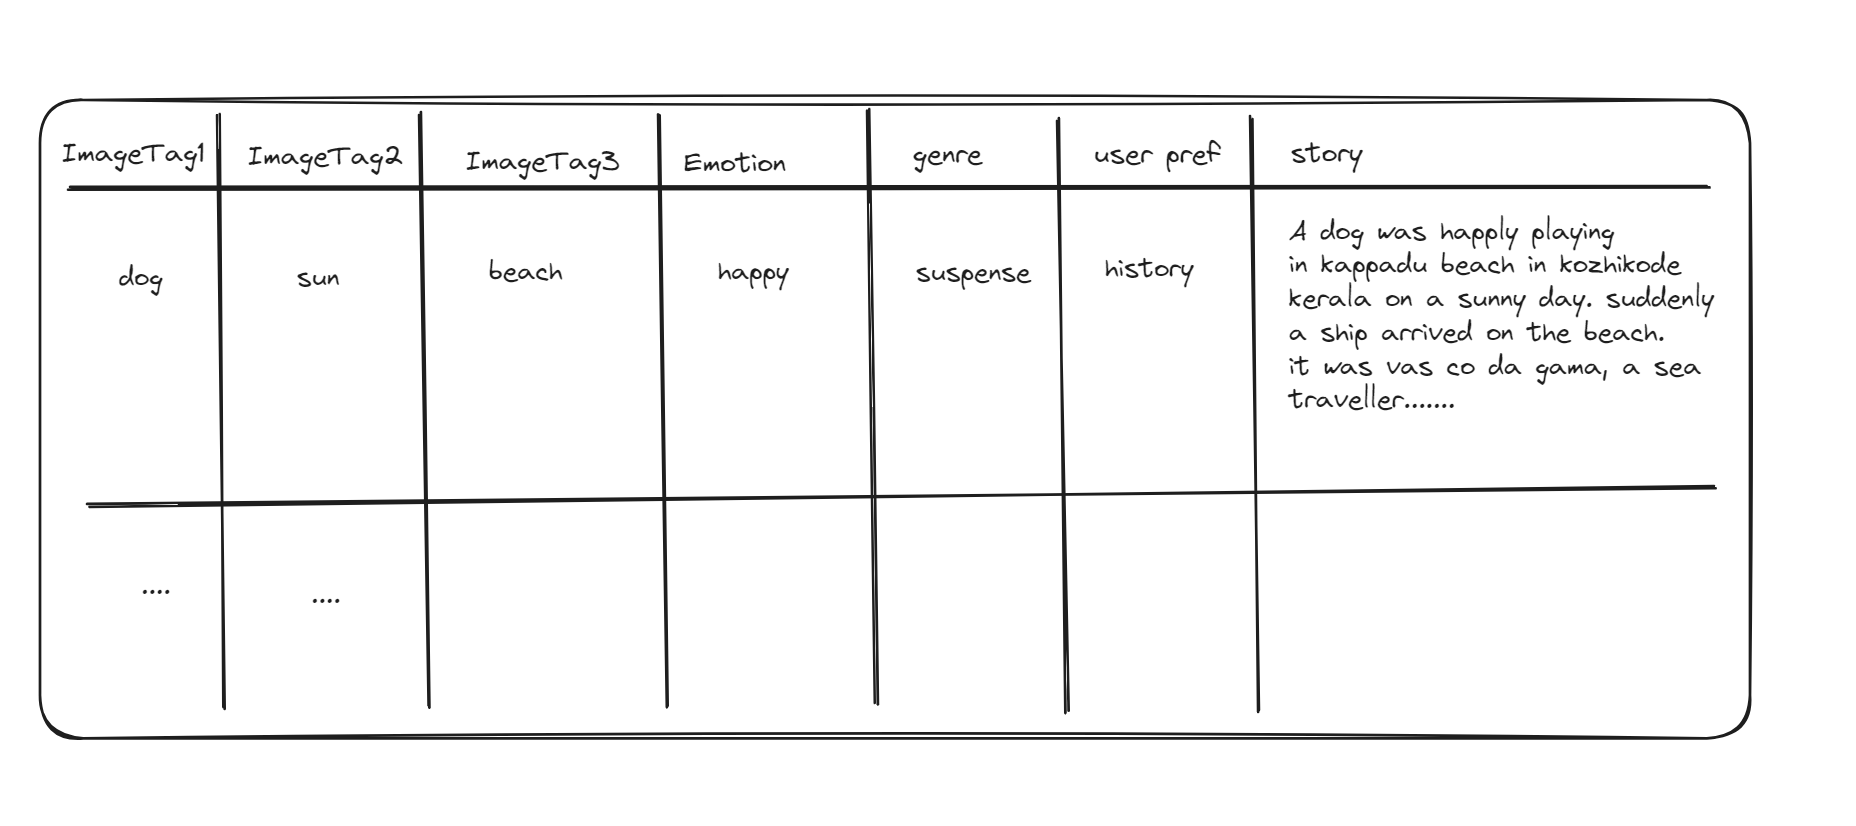

Let's load a story dataset called TinyStories.

TinyStories1, a synthetic dataset of short stories that are intended to contain only
words that most 3 to 4-year-old children would typically understand, generated by GPT-3.5 and GPT-4. TinyS
tories is designed to capture the essence of natural language, while reducing its breadth and diversity. Each story
consists of 2-3 paragraphs that follow a simple plot and a consistent theme, while the whole dataset aims to span
the vocabulary and the factual knowledge base of a 3-4 year old child

In [ ]:
%pip install transformers datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset('roneneldan/TinyStories')

Repo card metadata block was not found. Setting CardData to empty.
Generating validation split: 100%|██████████| 21990/21990 [00:00<00:00, 234816.78 examples/s]


In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 2119719
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 21990
    })
})


In [ ]:
print(dataset.shape)

{'train': (2119719, 1), 'validation': (21990, 1)}


let's check a sample story

In [ ]:
print(dataset['train'][0])

{'text': 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt.\n\nLily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt."\n\nTogether, they shared the needle and sewed the button on Lily\'s shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'}


## Step 3.1 Base Model 1

## Step 3.2 Base Model 2 

## Step 4. Fine tune the model using Supervised Learning

## Step 5. Model Performance